# Benchmark Python json libraries

### The following json libraries are benchmarked
> * json `(Python inbuilt jsonlib)`
> * rapidjson `(python-rapidjson)`
> * orjson `(orjson)`
> * ujson `(ujson)`

### Benchmark Information
> * **OS**: Windows
> * **Python versions**: 2.7, 3.7

### Files used for benchmark
> * data/small.json - `3KB`
> * data/medium.json - `56KB`
> * data/twitter.json - `848KB` 

In [2]:
import json as pyjson
import os
import pandas as pd
import timeit

import orjson
import rapidjson
import simplejson
import ujson


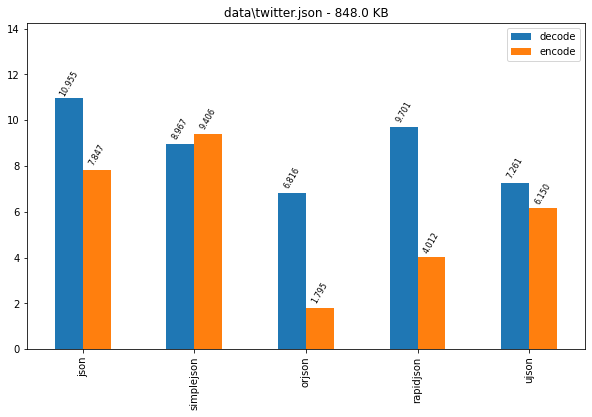

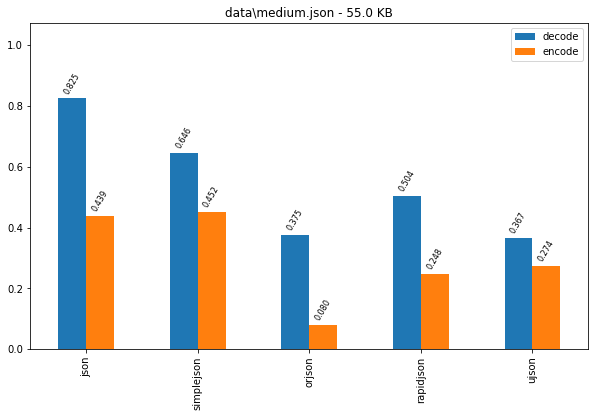

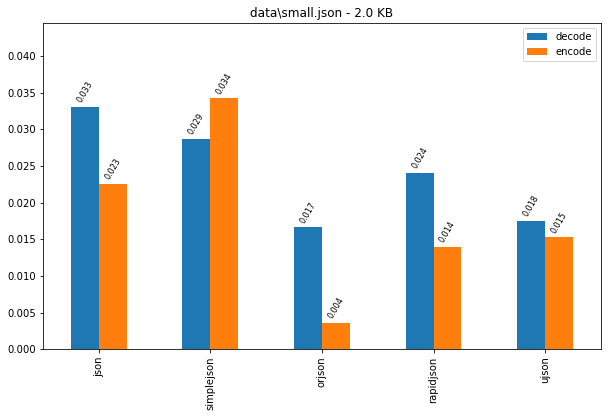

In [11]:
def metrics_json_decode(number, json_file_name):
    """
    loads json form the file specified json_file_name
    """
    json_decode = {}
    with open(json_file_name, "rb") as f:
        data = f.read()
    for json_module in (pyjson, simplejson, orjson, rapidjson, ujson):
        secs = timeit.timeit(lambda: json_module.loads(data), number=number)
        json_decode[json_module.__name__] = secs
    return json_decode


def metrics_json_encode(number, json_file_name):
    """
    dumps json
    """
    json_encode = {}
    with open(json_file_name, "rb") as f:
        large_dict = pyjson.loads(f.read()) 
    for json_module in (pyjson, simplejson, orjson, rapidjson, ujson):
        secs = timeit.timeit(lambda: json_module.dumps(large_dict), number=number)
        json_encode[json_module.__name__] = secs
    return json_encode


large_file = os.path.join("data", "twitter.json")
medium_file = os.path.join("data", "medium.json")
small_file = os.path.join("data", "small.json")
number = 1000  # Number of iterations
for file_name in (large_file, medium_file, small_file):
    size = round(os.path.getsize(file_name)/1024, 0)
    json_decode_metrics = metrics_json_decode(number, file_name)
    json_encode_metrics = metrics_json_encode(number, file_name)
    
    metrics = {"decode": json_decode_metrics, "encode": json_encode_metrics}
    df = pd.DataFrame(metrics)
    chart = df.plot.bar(figsize=(10, 6), title=f"{file_name} - {size} KB")
    max_value = 0
    for p in chart.patches:
         chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=8, color='black', xytext=(0, 15),
             textcoords='offset points', rotation=60)
         if max_value < p.get_height():
             max_value = p.get_height()
    _ = chart.set_ylim(0, max_value+max_value*0.3) 
